<a href="https://colab.research.google.com/github/MADNESSru/AG_News_clf_problem/blob/main/AG_news_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project: AG News Classification**

# **About Dataset**

AG is a collection of more than 1 million news articles gathered from over 2000 news sources by ComeToMyHead, an academic news search engine. Xiang Zhang created AG's news topic categorization dataset using the original AG dataset. It serves as a text classification benchmark in the paper "Character-level Convolutional Networks for Text Classification" by Xiang Zhang, Junbo Zhao, and Yann LeCun. The classification dataset is created by selecting the four largest classes from the original corpus. Each class consists of 30,000 training samples and 1,900 testing samples. The total number of training samples is 120,000, whereas testing samples are 7,600.

# **About Author**
### **Author:** Grechikhin Denis (**MADNESS**)  

### **Contact Info:**

#### **Email:** d9652052880@gmail.com
#### [Telegram](https://t.me/MLDenisRU)
#### [Github](https://github.com/MADNESSru)

# **Desired Results**
* Make the correct classification into 4 categories: "World News", "Sports News", "Business News", "Science Technology News"
* Use  model "Naive Bayes"
* Evaluate the results on the confusion matrix and suggest improvement options

# **Real Results**
* I successfully trained a Naive Bayes classifier for news classification! It's performing well, with an accuracy of around 89.5% and an F1 score of around 88.89%. Based on high accuracy and F1 scores, my model appears to be effective at distinguishing between various types of news articles.

* To improve the results, more complex neural network models (TextCNN, LSTM) can be used. It is also worth trying to retrain an LLM (for example, BERT) on this task. I was unable to do this within Kaggle Notebook due to RAM limitations.

# **Import Libraries and Download DataSet**

In [ ]:
# Text preprocessing and vectorization
import nltk
import re
import string as s
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text  import TfidfVectorizer, TfidfTransformer

# Visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from wordcloud import WordCloud
from tqdm import tqdm

# Working with the dataset and analyzing it
import numpy as np
import pandas as pd
import os

# Models
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier

# Metrics
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

# For download dataset
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/ag-news-classification-dataset/train.csv
/kaggle/input/ag-news-classification-dataset/test.csv


# **Load Dataset**

In [ ]:
train_data = pd.read_csv('/kaggle/input/ag-news-classification-dataset/train.csv', header=0,names=['ID','Title','Desc'])
test_data = pd.read_csv('/kaggle/input/ag-news-classification-dataset/test.csv', header=0,names=['ID','Title','Desc'])

# **Dataset checking**

### **Load Train Data and Test Data**

In [ ]:
train_data.head()

,ID,Title,Desc
0,3,Wall St. Bears Claw Back Into the Black (Reuters),"Reuters - Short-sellers, Wall Street's dwindli..."
1,3,Carlyle Looks Toward Commercial Aerospace (Reu...,Reuters - Private investment firm Carlyle Grou...
2,3,Oil and Economy Cloud Stocks' Outlook (Reuters),Reuters - Soaring crude prices plus worries\ab...
3,3,Iraq Halts Oil Exports from Main Southern Pipe...,Reuters - Authorities have halted oil export\f...
4,3,"Oil prices soar to all-time record, posing new...","AFP - Tearaway world oil prices, toppling reco..."


In [ ]:
test_data.head()

,ID,Title,Desc
0,3,Fears for T N pension after talks,Unions representing workers at Turner Newall...
1,4,The Race is On: Second Private Team Sets Launc...,"SPACE.com - TORONTO, Canada -- A second\team o..."
2,4,Ky. Company Wins Grant to Study Peptides (AP),AP - A company founded by a chemistry research...
3,4,Prediction Unit Helps Forecast Wildfires (AP),AP - It's barely dawn when Mike Fitzpatrick st...
4,4,Calif. Aims to Limit Farm-Related Smog (AP),AP - Southern California's smog-fighting agenc...


# **Data Shapes and Omissions**

In [ ]:
print(f"Shape of training data {train_data.shape}")
print(f"Shape of testing data {test_data.shape}")
print(f"Omissions in the training data {train_data.isna().sum()}")
print(f"Omissions in the testing data {test_data.isna().sum()}")

Shape of training data (120000, 3)
Shape of testing data (7600, 3)
Omissions in the training data ID       0
Title    0
Desc     0
dtype: int64
Omissions in the testing data ID       0
Title    0
Desc     0
dtype: int64


# **Countplot of ID column in Train Data**

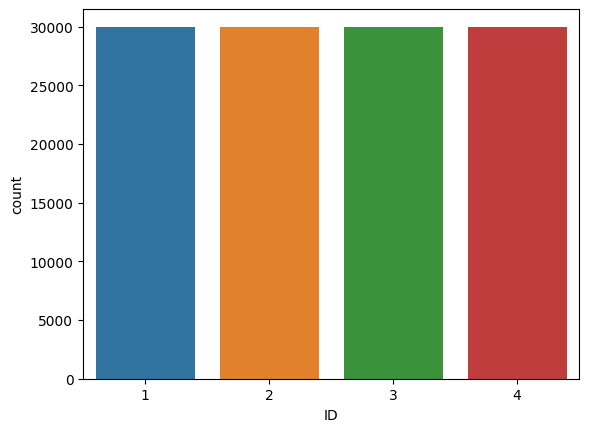

In [ ]:
sns.countplot(x = 'ID', data = train_data)
plt.show()

# **Countplot of ID column in Test Data**

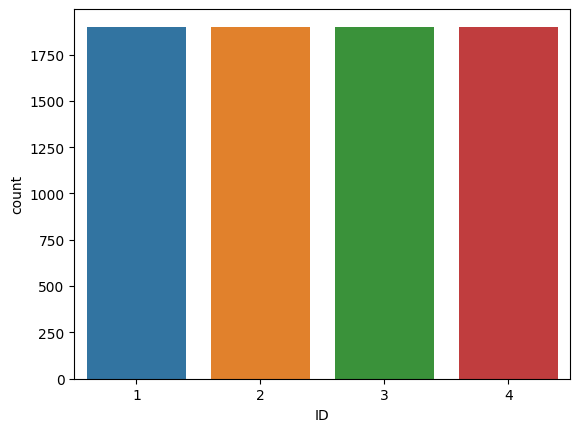

In [ ]:
sns.countplot(x = 'ID', data = test_data)
plt.show()

# **Preparing Data For a News Classification**

**Train_x and test_x represent the descriptions of news articles from training and testing datasets, respectively, whereas train_y and test_y represent the associated IDs or labels of the news articles for training and testing**

In [ ]:
train_x = train_data.Desc
test_x = test_data.Desc
train_y = train_data.ID
test_y = test_data.ID

# **Word Cloud Visualization**

**I did used the Word Cloud library to produce description data for news articles tagged with ID 1 in the training dataset, and then displays the resulting word cloud plot**

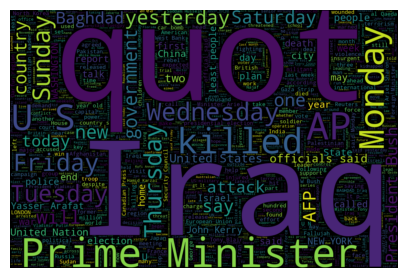

In [ ]:
world = train_data[train_data['ID'] == 1]['Desc']
plt.figure(figsize=(5, 5))
wordcloud = WordCloud(min_font_size=3, max_words=2500, width=1200, height=800).generate(" ".join(world))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

**I did generates a word cloud visualization for descriptions of news articles labeled "sports" in the training data**

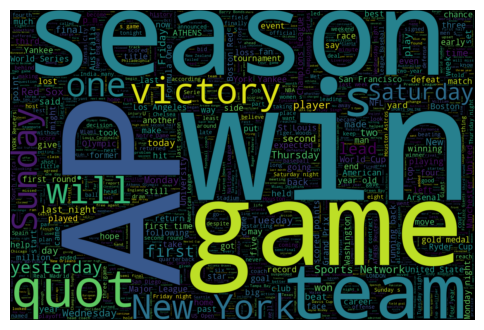

In [ ]:
sports_desc = train_data.loc[train_data['ID'] == 2, 'Desc']
plt.figure(figsize=(6, 6))
wordcloud = WordCloud(min_font_size=3, max_words=2500, width=1200, height=800).generate(" ".join(sports_desc))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

**Using the training data, I created a word cloud representation to describe a firm with ID 3, with the magnitude of each term equal to its frequency in the description**

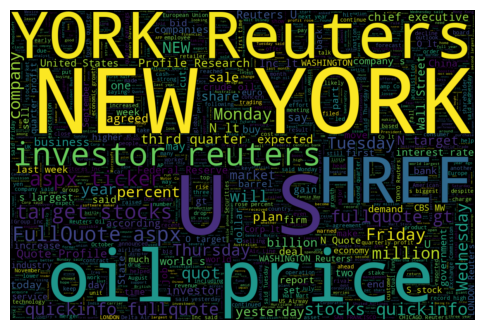

In [ ]:
biz_desc = train_data.loc[train_data['ID'] == 3, 'Desc']
plt.figure(figsize=(6, 6))
wordcloud = WordCloud(min_font_size=3, max_words=2500, width=1200, height=800).generate(" ".join(biz_desc))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

**I've been creating a word cloud image of the descriptions of scientific news articles with an ID of four from my training database**

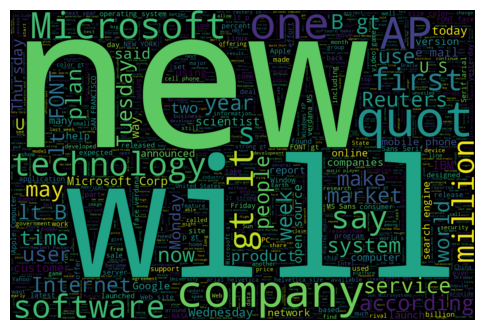

In [ ]:
sci_desc = train_data.loc[train_data['ID'] == 4, 'Desc']
plt.figure(figsize=(6, 6))
wordcloud = WordCloud(min_font_size=3, max_words=2500, width=1200, height=800).generate(" ".join(sci_desc))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# **Preprocessing Descriptions**

### **Removing Tags**

In [ ]:
def remove_html_tags(text):
    return re.sub(r'<[^>]+>', '', text)

train_x = train_x.apply(remove_html_tags)
test_x = test_x.apply(remove_html_tags)

### **Removing URL's**

In [ ]:
def remove_urls(text):
    url_pattern = re.compile(
        r'(?:https?://|www\.|ftp://|mailto:)\S+|'  # protocols
        r'\S+\.(?:com|net|org|io|gov|edu|me)\S*|'  # popular domains
        r'\S+/\S+'  # paths like xxxxx.com/path
    )
    return url_pattern.sub(r'', text).strip()

train_x = train_x.apply(remove_urls)
test_x = test_x.apply(remove_urls)

### **Tokenization**

In [ ]:
def word_tokenize(text):
    # The basic regular expression for tokenizing English text
    pattern = r"\w+(?:'\w+)?|\d+(?:,\d+)*(?:\.\d+)?|[^\w\s]"

    # Words with apostrophes (I'm, don't)
    # Numbers (1,000.50)
    # Punctuation as separate tokens

    return re.findall(pattern, text)

train_x = train_x.apply(word_tokenize)
test_x = test_x.apply(word_tokenize)

### **LowerCase**

In [ ]:
train_x = train_x.apply(lambda x: [word.lower() for word in x])
test_x = test_x.apply(lambda x: [word.lower() for word in x])

### **Removing StopWords**

In [ ]:
def remove_stopwords(lst):
    stop_words = set(stopwords.words('english'))
    return [word for word in lst if word.lower() not in stop_words]

train_x = train_x.apply(remove_stopwords)
test_x = test_x.apply(remove_stopwords)

### **Removing Punctuation**

In [ ]:
def remove_punctuations(lst):
    return [''.join(char for char in word if char not in s.punctuation) for word in lst]
train_x = train_x.apply(remove_punctuations)
test_x = test_x.apply(remove_punctuations)

### **Removing Numbers**

In [ ]:
def remove_number(lst):
    return [''.join(char for char in word if char not in s.digits) for word in lst if word]
train_x = train_x.apply(remove_number)
test_x = test_x.apply(remove_number)

### **Stemming**

In [ ]:
def stemming(text):
    porter_stemmer = PorterStemmer()
    return [porter_stemmer.stem(word) for word in text]
train_x = train_x.apply(stemming)
test_x = test_x.apply(stemming)

### **Removing ExtraWords**

In [ ]:
def remove_extra_words(word_list):
    stopwords = ['href', 'lt', 'gt', 'ii', 'iii', 'ie', 'quot', 'com']
    cleaned_list = []
    for word in word_list:
        if word not in stopwords:
            cleaned_list.append(word)
    return cleaned_list
train_x = train_x.apply(remove_extra_words)
test_x = test_x.apply(remove_extra_words)

# **join_words_with_space**

**I've defined a function called join_words_with_space that takes a list of words that appear to constitute sentences and connects them together in one string, with spaces between each word. Then, this function is applied to each element in the train_x and test_x datasets, converting any sentence from a list of words into a single string with spaces between them**

In [ ]:
def join_words_with_space(sentence):
    joined_sentence = ' '.join(sentence)
    return joined_sentence

train_x = train_x.apply(join_words_with_space)
test_x = test_x.apply(join_words_with_space)

# **Feature Extraction**

In [ ]:
tfidf = TfidfVectorizer(min_df=8, ngram_range=(1, 3))
train_1 = tfidf.fit_transform(train_x)
test_1 = tfidf.transform(test_x)
print("No. of features extracted:")
print(len(tfidf.vocabulary_))
print("First 100 feature names:")
print(list(tfidf.vocabulary_.keys())[:100])
train_arr = train_1.toarray()
test_arr = test_1.toarray()

No. of features extracted:
59392
First 100 feature names:
['reuter', 'short', 'seller', 'wall', 'street', 'dwindl', 'band', 'ultra', 'cynic', 'see', 'green', 'wall street', 'privat', 'invest', 'firm', 'carlyl', 'group', 'reput', 'make', 'well', 'time', 'occasion', 'controversi', 'play', 'defens', 'industri', 'quietli', 'place', 'bet', 'anoth', 'part', 'market', 'reuter privat', 'privat invest', 'invest firm', 'carlyl group', 'play defens', 'soar', 'crude', 'price', 'plu', 'worri', 'economi', 'outlook', 'earn', 'expect', 'hang', 'stock', 'next', 'week', 'depth', 'summer', 'doldrum', 'soar crude', 'crude price', 'worri economi', 'economi outlook', 'earn expect', 'stock market', 'market next', 'next week', 'author', 'halt', 'oil', 'export', 'flow', 'main', 'pipelin', 'southern', 'iraq', 'intellig', 'show', 'rebel', 'militia', 'could', 'strike', 'infrastructur', 'offici', 'said', 'saturday', 'oil export', 'pipelin southern', 'southern iraq', 'rebel militia', 'oil offici', 'offici said', 's

In [ ]:
feature_names = tfidf.get_feature_names_out()
pd.DataFrame(train_arr[:100], columns=feature_names)

,aa,aa billion,aa footbal,aaa,aapl,aapl news,aaron,aaron peirsol,aaron rodger,ab,...,zone,zoo,zook,zook fire,zoom,zurich,zurich challeng,zurich reuter,zurich switzerland,zvonareva
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
96,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
97,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
98,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# **Applying Model**

### **Naive Bayes**

The beginning of Naive Bayes training


100%|██████████| 1/1 [00:30<00:00, 30.15s/it]


Training completed.

Accuracy: 0.8947368421052632
F1-Score: 0.8944686492191884


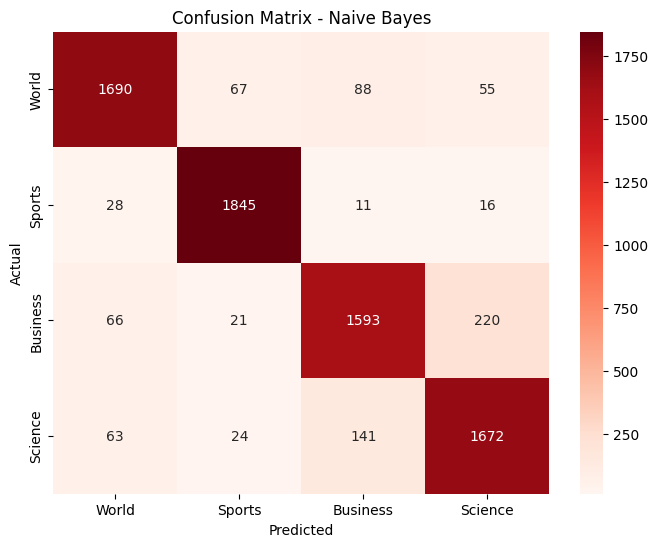

In [ ]:
NB_MN = MultinomialNB()

print("The beginning of Naive Bayes training")
with tqdm(total=1) as pbar:
    NB_MN.fit(train_arr, train_y)
    pbar.update(1)
print("Training completed.")

NB_MN_pred = NB_MN.predict(test_arr)

print("\nAccuracy:", accuracy_score(test_y, NB_MN_pred))
print("F1-Score:", f1_score(test_y, NB_MN_pred, average='weighted'))

cm = confusion_matrix(test_y, NB_MN_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', xticklabels=['World', 'Sports', 'Business', 'Science'],
            yticklabels=['World', 'Sports', 'Business', 'Science'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Naive Bayes')
plt.show()